# Abstracto

El notebook que se verá a continuación es una recopilación de data del Banco Mundial y de una ONG que trabaja el análisis de datos de pobreza globales. Este análisis lo que busca es determinar el impacto que tienen ciertas variables en la pobreza y en particular en la probabilidad de ser pobre en cada región. Este notebook agrupa sus valores en las siguientes regiones.

- America Látina y el Caribe
- Este de Asia y Asia Pacifico
- Medio Oriente y Norte de Africa
- Sur de Asia
- Europa (del Este) y Asia Central
- Paises de Altos ingresos.

El análisis se centrará en como algunas variables impactan en la probabilidad de ser pobre en cada una de estas regiones, centrandose en una primera instancia en las variables tradicionales como lo es la desigualdad de ingresos (gini), los ingresos promedio país (reporting_gdp) y la fuente principal de la creación de riqueza (welfare_type). De esta manera lo que se busca es enriquecer el análisis situacional de los paises de cara a evidenciar que aspectos son más relevantes a la hora de diseñar planes económimcos orientados a la mejora en la calidad de vida y disminución de la pobreza.

¿Es la desigualdad de ingresos la variable de mayor impacto sobre la pobrabilidad de ser pobre?

¿América Latína es la región más desigual del mundo?

¿América Latína tiene la pobrabilidad más alta de ser pobre?

## Carga de los datos

El DataFrame con el que se trabajó en este notebook provenía de un trabajo previo donde se unieron ambos df, creando un nuevo archivo CSV que es el cual se lee y carga al notebook. Este archivo es la unión entre los datos de probabilidad y las cifras del Banco Mundial.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
pob=pd.read_csv('probabilidad_api.csv')

In [6]:
dfpob=pob.drop(['Unnamed: 0','region_code_y', 'country_name','country_code','reporting_year_y','survey_acronym','reporting_level','survey_coverage',
         'comparable_spell','poverty_line_y'], axis=1)
dfpob

,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,can_add,...,is_interpolated,distribution_type,estimation_type,reporting_pop_y,headcount_y,poverty_gap_y,poverty_severity_y,watts_y,mean_y,pop_in_poverty
0,Middle East & North Africa,0,18,1,1,2,2,1,1,1,...,0,micro,survey,387784643,0.0597,0.0176,0.0074,0.0233,10.5923,23153623
1,Middle East & North Africa,1,30,1,1,2,2,1,1,1,...,0,micro,survey,387784643,0.0597,0.0176,0.0074,0.0233,10.5923,23153623
2,Middle East & North Africa,0,35,0,1,2,1,1,0,1,...,0,micro,survey,387784643,0.0597,0.0176,0.0074,0.0233,10.5923,23153623
3,Middle East & North Africa,0,32,1,1,2,5,1,1,1,...,0,micro,survey,387784643,0.0597,0.0176,0.0074,0.0233,10.5923,23153623
4,Middle East & North Africa,1,50,0,1,2,5,2,1,1,...,0,micro,survey,387784643,0.0597,0.0176,0.0074,0.0233,10.5923,23153623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101208,East Asia & Pacific,0,60,0,1,4,1,1,1,1,...,0,micro,survey,2091765805,0.0088,0.0016,0.0006,0.0019,12.4153,18438607
101209,East Asia & Pacific,0,60,0,1,4,1,1,1,1,...,0,micro,survey,2091765805,0.0088,0.0016,0.0006,0.0019,12.4153,18438607
101210,East Asia & Pacific,0,60,0,1,4,1,1,1,1,...,0,micro,survey,2091765805,0.0088,0.0016,0.0006,0.0019,12.4153,18438607
101211,East Asia & Pacific,0,60,0,1,4,1,1,1,1,...,0,micro,survey,2091765805,0.0088,0.0016,0.0006,0.0019,12.4153,18438607


# Exploración Analitica de Datos (EDA)

In [4]:
dfpob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101213 entries, 0 to 101212
Data columns (total 99 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   country                                101213 non-null  object 
 1   is_urban                               101213 non-null  int64  
 2   age                                    101213 non-null  int64  
 3   female                                 101213 non-null  int64  
 4   married                                101213 non-null  int64  
 5   religion                               101213 non-null  int64  
 6   relationship_to_hh_head                101213 non-null  int64  
 7   education_level                        101213 non-null  int64  
 8   literacy                               101213 non-null  int64  
 9   can_add                                101213 non-null  int64  
 10  can_divide                             101213 non-null  

In [7]:
dfpob['bank_interest_rate'].fillna(0,inplace=True)
dfpob['mm_interest_rate'].fillna(0,inplace=True)
dfpob['mfi_interest_rate'].fillna(0,inplace=True)
dfpob['other_fsp_interest_rate'].fillna(0,inplace=True)
dfpob['education_level'].fillna(pob['education_level'].mean(), inplace=True)
dfpob['share_hh_income_provided'].fillna(pob['share_hh_income_provided'].mean(),inplace=True)
dfpob['median'].fillna(pob['median'].mean(), inplace=True)
dfpob['ppp'].fillna(pob['ppp'].mean(), inplace=True)
dfpob['reporting_pce'].fillna(pob['reporting_pce'].mean(), inplace=True)

Luego de revisar el dato de las variables con datos vacíos se decide rellenar con 0 esto principalmente porque estas variables lo que determinan es la existencia de una condición, son variables categoricas. En otros casos como lo es la variable "mean" o "ppp", estas arrogan un valor del conjunto por lo tanto en estos casos se rellenó con el promedio de los datos existentes. 

<AxesSubplot:>

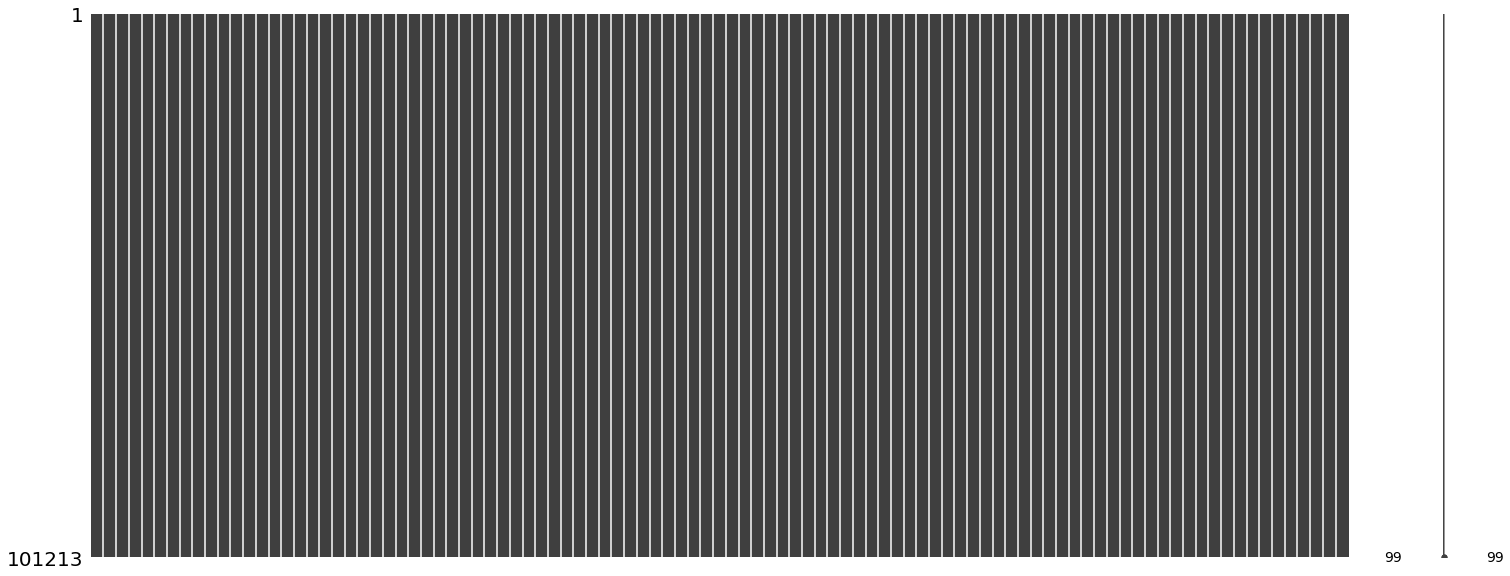

In [6]:
import missingno as msno
msno.matrix(dfpob)

Vemos que el data set ahora se encuentra completo

<AxesSubplot:xlabel='poverty_probability', ylabel='country'>

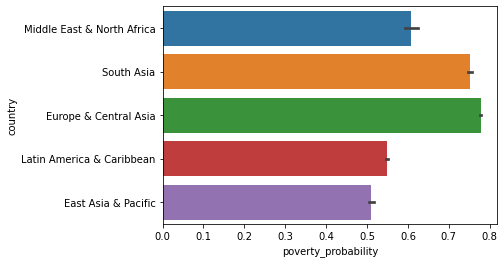

In [7]:
sns.barplot(data=dfpob, x="poverty_probability", y="country")

Vemos que la región con mayor cantidad de datos cercanos a 1 es Europa del Este y Asia Central, seguida del Sur de Asia, dejando en un 4 lugar a América Latína

<AxesSubplot:xlabel='welfare_type', ylabel='count'>

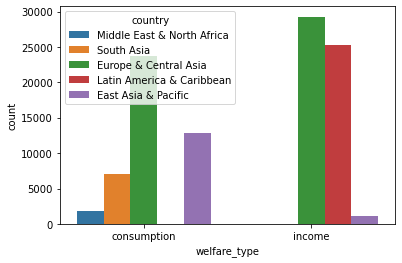

In [8]:
sns.countplot(x="welfare_type", hue="country", data=dfpob)

Sobre el origen de la riqueza por región vemos que en el caso de America Latina esta se concentra en los ingresos, es decir, en que las personas dependen de su capacidad de trabajo. En la región de Europa del Este y Asía Central por ejemplo esta capacidad se distribuye entre ingreso y consumo, esto ultimo quiere decir que la riqueza se genera mediante la adquisición de bienes y servicios por lo que uno podría presumir que la distribución de la riqueza es más alta.

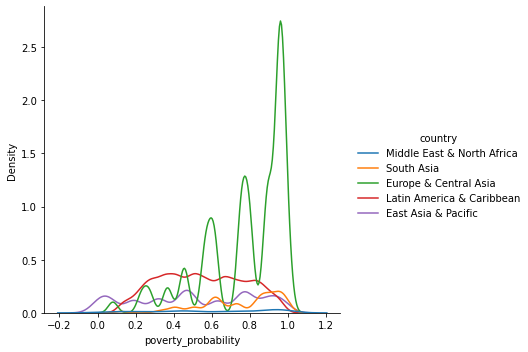

In [9]:
sns.displot(dfpob, x="poverty_probability", hue="country", kind="kde")

Apesar de lo anterior vemos que en Europa del Este y Asia Central (E.A.C) es donde se concentra la mayor cantidad de valores cercanos a 1, esto podria ser por distintas razones entre las cuales esta el numero de población y la estructura social. En el caso de America Latina (A.L) vemos que los datos se concentran entre 0.2 y 0.8, lo que implicaría que la probabilidad es menor pero esta latente entre toda la población. Según los datos que hemos visto hasta el momento, esto estaría relacionado al origen de la riqueza, el trabajo.

## Situación particular según indicador relevante - Gini, Probabilidad, Mediana

A nivel de detalle según cifras de Gini, probabilidad y la Mediana de las cifras de pobreza por Región vemos que si bien la probabilidad de ser pobre se repite con más frecuencia en las regiones en cuanto a cifras cercanas a 1, la mediana se ubica entre valores de 1 y 10. Estos dos valores son coherentes unos con otros dado la mediana explica el punto intermedio entre dos grupos, en este caso, "pobres y no pobres" por lo que de existir entre el 1 y el 10% de pobres en la mayoría de los paises, esto explicaría porque la pobrabilidad de ser pobre cuenta con picos de valor y solo al llegar a 1 aumenta exponencialmente su cantidad. El valor gini, que refleja la desigualdad de ingresos por región muestra una asimetría de izquierda al tener más valores entre 0 y 0.4, por lo que, si bien se considera alto un gini cercano a 0.4, que la mayoría de los paises presenten valores similares de desigualdad indica que America Latina a pesar de poder ser una región desigual, esta condición no esta condicionando para ser la región donde es más probable ser pobre. 

C:\Users\talon\AppData\Local\Temp\ipykernel_17824\2475167461.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfpob[col], bins = bins, rug=False, hist = hist)


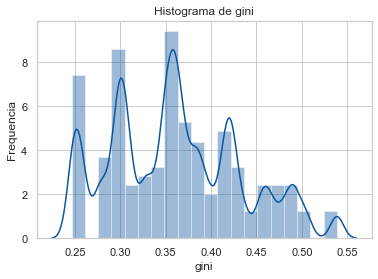

C:\Users\talon\AppData\Local\Temp\ipykernel_17824\2475167461.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfpob[col], bins = bins, rug=False, hist = hist)


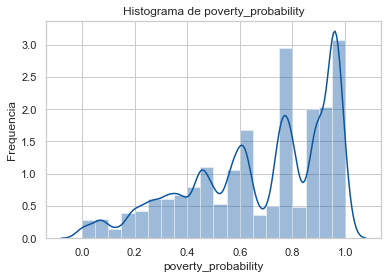

C:\Users\talon\AppData\Local\Temp\ipykernel_17824\2475167461.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfpob[col], bins = bins, rug=False, hist = hist)


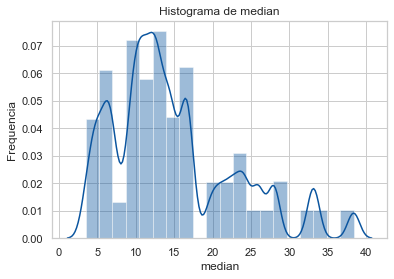

In [10]:
num_cols = ['gini','poverty_probability', 
            'median'] 
def plot_density_hist(dfpob, cols, bins = 10, hist = False):
    for col in cols:
        sns.set(style="whitegrid", palette='Blues_r')
        sns.distplot(dfpob[col], bins = bins, rug=False, hist = hist)
        plt.title('Histograma de ' + col) 
        plt.xlabel(col) 
        plt.ylabel('Frequencia')
        plt.show()
        
plot_density_hist(dfpob, num_cols, bins = 20, hist = True)

Aqui se evidencia que las regiones de America Latina y la Africa Subsahariana son las regiones que presentan Gini más alto, pero comparativamente con las de probabilidad de ser pobre, ambas regiones se ubicaban en el 4 y 5 lugar. Por tanto, si bien podemos señalar que la región es desigual, esto no afecta en cuanto a las probabilidades de ser pobre. 

<AxesSubplot:xlabel='gini', ylabel='country'>

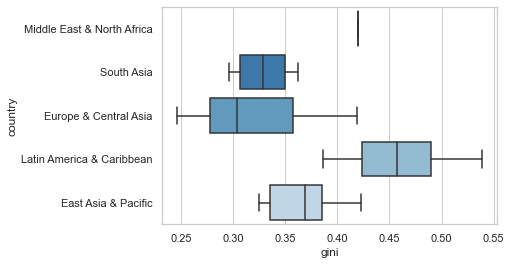

In [11]:
sns.boxplot(data=dfpob, x="gini", y='country')

Ahora vemos que la desigualdad de ingresos en A-L es donde están los valores más altos y en E.A.C se ve que su media es la más baja, de 0.3. Por lo que se podría suponer de momento del analisis independiente de los datos de probablidad de ser pobre y desigualdad de ingreso, que aparentemente no existiría una relación lineal, puesto sabemos que en E.A.C es donde esta la mayor probabildiad de ser pobre pero al mismo tiempo la menor desigualdad. Esto se podría dar en cuanto a que existe la mayor cantidad de personas pobres, por lo que existen menos personas ricas y por tanto son todos más similares en cuanto a ingresos.

<AxesSubplot:xlabel='reporting_gdp', ylabel='country'>

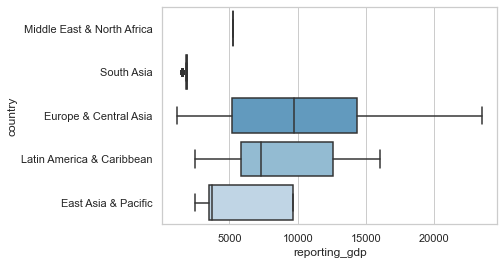

In [12]:
sns.boxplot(data=dfpob, x="reporting_gdp", y='country')

Ahora bien respecto al ultimo supuesto vemos que en E.A.C no es la región con los menores ingresos por lo que no es una región donde son todos igualmente pobres, teniendo una media de ingresos cercana a los 10 mil USD. En el caso de A.L vemos que esta media se encuentra entre los 6 mil y los 7 mil USD. Siendo valores similares vemos que los dos regiones presentan situaciones dispares respecto a la pobrabilidad de ser pobre y la desigualdad de ingresos.

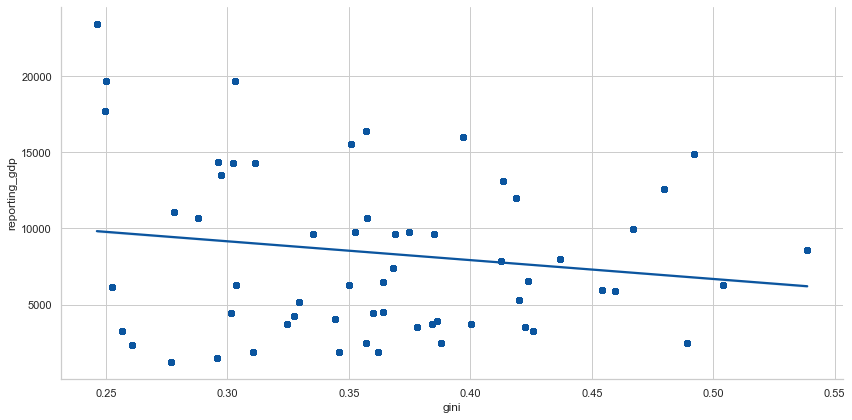

In [13]:
sns.lmplot(x='gini',y='reporting_gdp',data=dfpob,aspect=2,height=6)

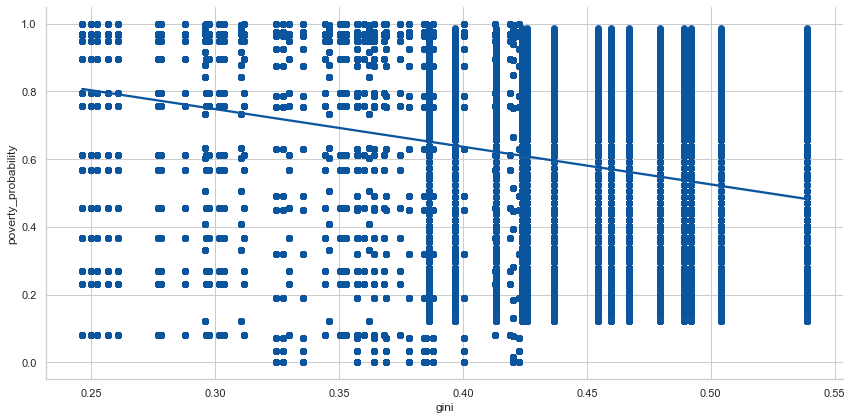

In [14]:
sns.lmplot(x='gini',y='poverty_probability',data=dfpob,aspect=2,height=6)

Estos dos graficos muestran que la desigualdad de ingresos aumenta a medida que aumenta también la probabilidad de ser pobre y aumenta cuando los paises tienen ingresos más bajos. Por lo tanto, podemos decir que los valores para gini disminuyen cuando los paises logran acumular riqueza.

In [15]:
pob_muestra=dfpob.pivot_table(index='country',values=
['poverty_probability','reporting_gdp','gini'],aggfunc='mean') 
pob_muestra

,gini,poverty_probability,reporting_gdp
country,,,
East Asia & Pacific,0.369664,0.510899,5227.081920
Europe & Central Asia,0.317731,0.777992,10221.639666
Latin America & Caribbean,0.454871,0.549322,8390.226071
Middle East & North Africa,0.420000,0.607907,5293.754900
South Asia,0.328625,0.752714,1792.137525


La tabla muestra numericamente los promedios para las variables que se proyectaron en los graficos anteriores

## Linea de Tiempo

Los siguientes datos reflejan el avance en el tiempo de los valores del Datast del Banco Mundial, datos que van desde 1970 hasta el 2019. En esta línea de tiempo podemos ver como evolucionaron los valores de las variables gini y GDP declarado en promedio por región. Esto nos permite ver como ha evolucionado la situación en cada región para hacer el comparado no solo respecto a los datos del 2019, sino, que además como fueron evolucionando, donde podemos ver que en el caso de Gini, si bien la situación actual es grave, en retroespectiva fue bastante peor incluso existiendo periodos con un crecimiento explosivo. Además vemos que desde el año 2000 nos encontramos en una pendiente negativa constante, lo que se refleja también en el crecimiento del GDP. Situaciones que llaman la atención es la caída extrepitosa del GDP de los países de grandes ingresos, esto se podría dar por la expulsión de un país o la incorporación de uno con un gran PIB pero bajo per capita (ej. China). 

In [16]:
pob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101213 entries, 0 to 101212
Columns: 109 entries, Unnamed: 0 to pop_in_poverty
dtypes: float64(32), int64(65), object(12)
memory usage: 84.2+ MB


In [17]:
pob.head()

,Unnamed: 0,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,...,region_code_y,reporting_year_y,reporting_pop_y,poverty_line_y,headcount_y,poverty_gap_y,poverty_severity_y,watts_y,mean_y,pop_in_poverty
0,0,Middle East & North Africa,0,18,1,1,2,2,1,1,...,MNA,2018,387784643,1.9,0.0597,0.0176,0.0074,0.0233,10.5923,23153623
1,1,Middle East & North Africa,1,30,1,1,2,2,1,1,...,MNA,2018,387784643,1.9,0.0597,0.0176,0.0074,0.0233,10.5923,23153623
2,2,Middle East & North Africa,0,35,0,1,2,1,1,0,...,MNA,2018,387784643,1.9,0.0597,0.0176,0.0074,0.0233,10.5923,23153623
3,3,Middle East & North Africa,0,32,1,1,2,5,1,1,...,MNA,2018,387784643,1.9,0.0597,0.0176,0.0074,0.0233,10.5923,23153623
4,4,Middle East & North Africa,1,50,0,1,2,5,2,1,...,MNA,2018,387784643,1.9,0.0597,0.0176,0.0074,0.0233,10.5923,23153623


In [8]:
pob['reporting_year_y'] = pd.to_datetime(pob['reporting_year_y'], format='%Y')

In [18]:
pob['reporting_year_y'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 101213 entries, 0 to 101212
Series name: reporting_year_y
Non-Null Count   Dtype
--------------   -----
101213 non-null  int64
dtypes: int64(1)
memory usage: 790.9 KB


<AxesSubplot:xlabel='reporting_year', ylabel='gini'>

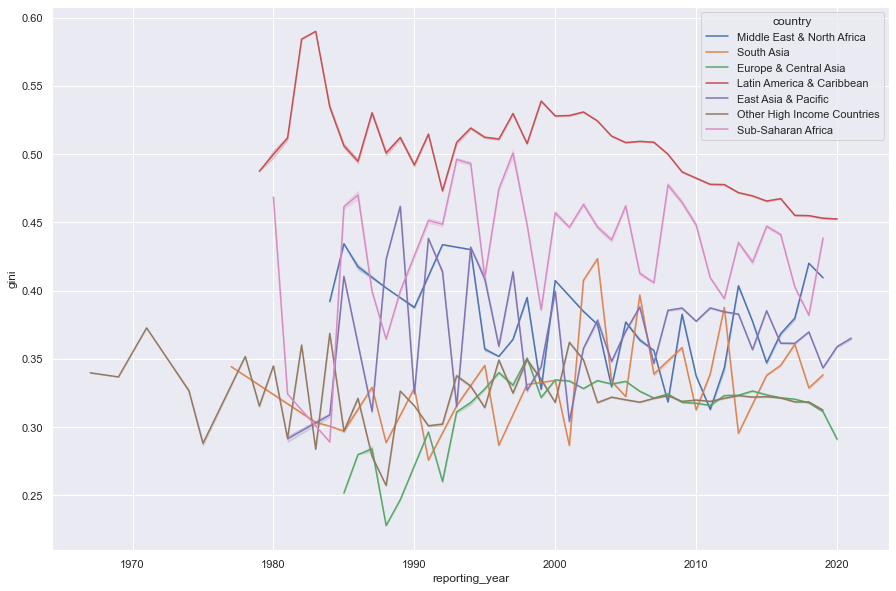

In [14]:
sns.set(rc={"figure.figsize":(15, 10)})
sns.lineplot(data=pob, x="reporting_year", y="gini", hue='country')

<AxesSubplot:xlabel='reporting_year', ylabel='reporting_gdp'>

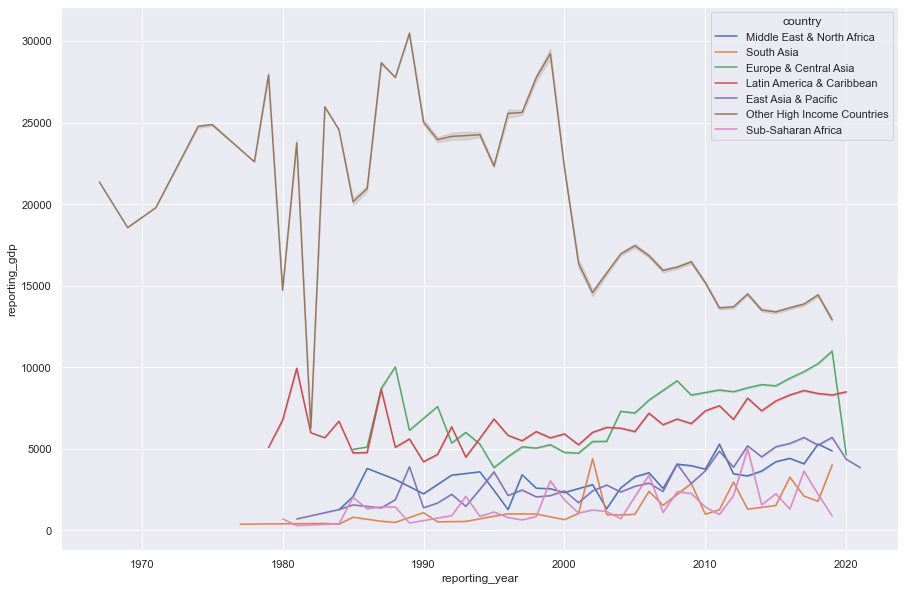

In [15]:
sns.lineplot(data=pob, x="reporting_year", y="reporting_gdp", hue='country')

Esta línea de tiempo nos muestra que todas las regiones, salvo la de los paises de ingresos altos, subieron su niveles de ingresos. En particular sobre los países de ingresos altos se puede preveer que los datos no tienen todos los años dados los picos de baja que no se ven reflejados en los otros paises. Para las regiones que estamos analizando, en particular A.L, vemos que su línea de ingresos desde finales de los 1990 ha ido al alza contrario a lo que ha ocurrido con los valores de gini que el año 2000 se ve claramente como ha ido disminuyendo.

# Análisis Univariado

In [20]:
muestra= pob[['country','poverty_probability','gini','reporting_gdp']]

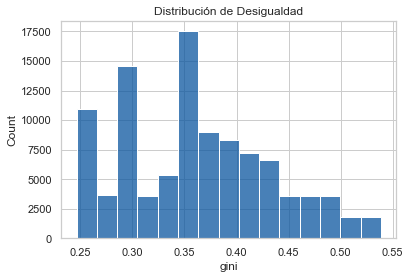

In [21]:
sns.histplot(data= dfpob, x='gini', kde=False,bins=15) 
plt.title('Distribución de Desigualdad')
plt.show()

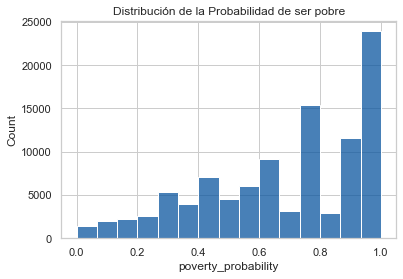

In [22]:
sns.histplot(data= dfpob, x='poverty_probability', kde=False,bins=15) 
plt.title('Distribución de la Probabilidad de ser pobre')
plt.show()

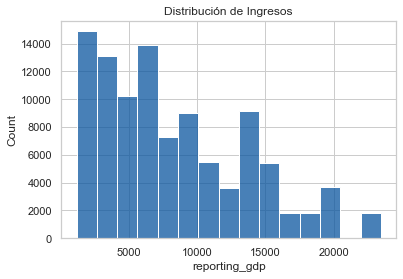

In [23]:
sns.histplot(data= dfpob, x='reporting_gdp', kde=False,bins=15) 
plt.title('Distribución de Ingresos')
plt.show()

# Análisis Bivariado

<AxesSubplot:>

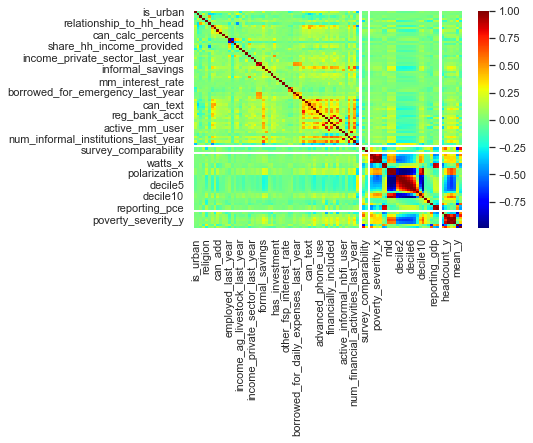

In [24]:
corr = dfpob.corr()
sns.heatmap(dfpob.corr(), cmap='jet')

In [64]:
pos_corr= corr['poverty_probability']>=0
corr['poverty_probability'][
    pos_corr].sort_values(ascending=False).round(2)

poverty_probability    1.00
decile4                0.14
decile5                0.14
decile3                0.13
decile6                0.13
decile2                0.13
decile7                0.12
decile1                0.11
decile8                0.06
cpi                    0.00
Name: poverty_probability, dtype: float64

In [65]:
neg_corr= corr['poverty_probability']<0
corr['poverty_probability'][neg_corr].sort_values(ascending=False).round(2)

ppp                -0.03
reporting_pop      -0.03
reporting_gdp      -0.04
poverty_severity   -0.05
watts              -0.07
poverty_gap        -0.07
headcount          -0.07
median             -0.09
decile9            -0.10
mean               -0.10
reporting_pce      -0.11
mld                -0.13
polarization       -0.13
decile10           -0.13
gini               -0.13
Name: poverty_probability, dtype: float64

In [66]:
pos_corr= corr['gini']>=0
corr['gini'][pos_corr].sort_values(ascending=False).round(2)

gini                1.00
decile10            0.98
mld                 0.98
polarization        0.97
decile9             0.68
poverty_severity    0.34
poverty_gap         0.31
watts               0.31
headcount           0.27
cpi                 0.02
Name: gini, dtype: float64

In [67]:
neg_corr= corr['gini']<0
corr['gini'][neg_corr].sort_values(ascending=False).round(2)

ppp                   -0.01
reporting_pop         -0.02
poverty_probability   -0.13
reporting_gdp         -0.23
reporting_pce         -0.32
mean                  -0.34
median                -0.42
decile8               -0.51
decile7               -0.87
decile1               -0.91
decile6               -0.95
decile2               -0.98
decile5               -0.98
decile4               -0.99
decile3               -0.99
Name: gini, dtype: float64

In [68]:
pos_corr= corr['reporting_gdp']>=0
corr['reporting_gdp'][pos_corr].sort_values(ascending=False).round(2)

reporting_gdp    1.00
mean             0.53
median           0.53
reporting_pce    0.43
decile7          0.32
decile6          0.30
decile8          0.29
decile5          0.28
decile4          0.26
decile3          0.23
decile2          0.19
decile1          0.06
cpi              0.02
Name: reporting_gdp, dtype: float64

In [69]:
neg_corr= corr['reporting_gdp']<0
corr['reporting_gdp'][neg_corr].sort_values(ascending=False).round(2)

poverty_probability   -0.04
decile9               -0.05
reporting_pop         -0.10
ppp                   -0.15
mld                   -0.19
poverty_severity      -0.20
polarization          -0.21
gini                  -0.23
decile10              -0.27
watts                 -0.30
poverty_gap           -0.32
headcount             -0.39
Name: reporting_gdp, dtype: float64

Respecto a la correlación en las tres variables analisadas vemos que no destaca ninguna variable con un impacto significativo salvo en el caso de gini con las variables "decile" esto es de esperar debido a que dichas variables consideran el corte poblacional según ingresos, de todas formas lo relevante hasta el momento es que se repite la situación que a mayor riqueza los valores de desigualdad disminuyen y no a la inversa. 

## Análisis comparado Categorico - Numerico

In [44]:
pob.groupby('country')['reporting_gdp'].mean().sort_values(ascending=True)

country
South Asia                      1634.593426
Sub-Saharan Africa              1677.663578
Middle East & North Africa      3351.740921
East Asia & Pacific             3425.323779
Latin America & Caribbean       6697.781055
Europe & Central Asia           7804.421610
Other High Income Countries    17185.877709
Name: reporting_gdp, dtype: float64

In [45]:
pob.groupby('country')['gini'].mean().sort_values(ascending=True)

country
Other High Income Countries    0.320146
Europe & Central Asia          0.322498
South Asia                     0.337171
East Asia & Pacific            0.365240
Middle East & North Africa     0.371333
Sub-Saharan Africa             0.437577
Latin America & Caribbean      0.496973
Name: gini, dtype: float64

In [46]:
pob.groupby('country')['poverty_probability'].mean().sort_values(ascending=True)

country
East Asia & Pacific            0.512708
Other High Income Countries    0.530406
Sub-Saharan Africa             0.547761
Latin America & Caribbean      0.549322
Middle East & North Africa     0.607907
South Asia                     0.752714
Europe & Central Asia          0.777992
Name: poverty_probability, dtype: float64

Aqui se muestra numericamente los valores por región para cada variable lo que muestra que A.L no es la región más pobre, estando al nivel de E.A.C en ingresos pero con un gini superior, siendo el más alto de la muestra. Respecto a la probabilidad de ser pobre, para la región sus datos se equiparan a los del Africa Subsahariana. 

## Análisis comparado Categorico - Categorico

In [60]:
t=pd.crosstab(pob.welfare_type, pob.region_code)
t

region_code,EAP,ECA,LAC,MNA,OHI,SAS,SSA
welfare_type,,,,,,,
consumption,408639,687704,27075,116754,0,136521,387030
income,51301,440789,783370,0,953112,1773,5529


In [62]:
t=pd.crosstab(pob.welfare_type, pob.reporting_level)
t

reporting_level,national,rural,urban
welfare_type,,,
consumption,1554737,106336,102650
income,2122411,5307,108156


Comparando categorias de ingreso entre las regiones y zonas de habitabilidad vemos que A.L concentra su capacidad de riqueza como resultado del trabajo a diferencia de las otras regiones. Respecto a la distrubución entre lo rural o urbano vemos que las zonas rurales dependen del consumo interno a diferencia de las zonas urbanas que se distribuye entre ambos tipos de generación de riqueza.

# DataWrangling

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [10]:
label_encoder = preprocessing.LabelEncoder()
dfpob['welfare_type']= label_encoder.fit_transform(dfpob['welfare_type'])
  
dfpob['welfare_type'].unique()

array([0, 1])

In [11]:
label_encoder = preprocessing.LabelEncoder()
dfpob['distribution_type']= label_encoder.fit_transform(dfpob['distribution_type'])
  
dfpob['distribution_type'].unique()

array([2, 1, 0])

In [28]:
dfpob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101213 entries, 0 to 101212
Data columns (total 99 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   country                                101213 non-null  object 
 1   is_urban                               101213 non-null  int64  
 2   age                                    101213 non-null  int64  
 3   female                                 101213 non-null  int64  
 4   married                                101213 non-null  int64  
 5   religion                               101213 non-null  int64  
 6   relationship_to_hh_head                101213 non-null  int64  
 7   education_level                        101213 non-null  int64  
 8   literacy                               101213 non-null  int64  
 9   can_add                                101213 non-null  int64  
 10  can_divide                             101213 non-null  

In [12]:
dfpob['reporting_pce'].fillna(dfpob['reporting_pce'].median(),inplace=True)
dfpob['ppp'].fillna(dfpob['ppp'].median(),inplace=True)
dfpob['median'].fillna(dfpob['median'].median(),inplace=True)

In [13]:
mpob=dfpob.drop(['country','region_code_x', 'estimation_type'], axis=1)
mpob

,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,can_add,can_divide,...,reporting_pce,is_interpolated,distribution_type,reporting_pop_y,headcount_y,poverty_gap_y,poverty_severity_y,watts_y,mean_y,pop_in_poverty
0,0,18,1,1,2,2,1,1,1,1,...,2474.2879,0,2,387784643,0.0597,0.0176,0.0074,0.0233,10.5923,23153623
1,1,30,1,1,2,2,1,1,1,1,...,2474.2879,0,2,387784643,0.0597,0.0176,0.0074,0.0233,10.5923,23153623
2,0,35,0,1,2,1,1,0,1,1,...,2474.2879,0,2,387784643,0.0597,0.0176,0.0074,0.0233,10.5923,23153623
3,0,32,1,1,2,5,1,1,1,1,...,2474.2879,0,2,387784643,0.0597,0.0176,0.0074,0.0233,10.5923,23153623
4,1,50,0,1,2,5,2,1,1,1,...,2474.2879,0,2,387784643,0.0597,0.0176,0.0074,0.0233,10.5923,23153623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101208,0,60,0,1,4,1,1,1,1,1,...,2500.5054,0,2,2091765805,0.0088,0.0016,0.0006,0.0019,12.4153,18438607
101209,0,60,0,1,4,1,1,1,1,1,...,2500.5054,0,2,2091765805,0.0088,0.0016,0.0006,0.0019,12.4153,18438607
101210,0,60,0,1,4,1,1,1,1,1,...,3291.5143,0,2,2091765805,0.0088,0.0016,0.0006,0.0019,12.4153,18438607
101211,0,60,0,1,4,1,1,1,1,1,...,1698.2083,0,2,2091765805,0.0088,0.0016,0.0006,0.0019,12.4153,18438607


### Selección de Variables para la condición de "Probabilidad de ser Pobre" 

Con esto lo que se busca es determinar la menor cantidad de variables para poder realizar la predicción y de esa forma determinar las condiciones que impactan en la probabilidad de ser pobre, la desigualdad y los ingresos promedios. Estas funciones lo que determinan es el p valor de cada variable según los parametros establecidos en la formula y así se van seleccionando solo aquellas que cumplan esa condición en el orden que se le indique, forward, backforward o stepwise en este caso.

Esta herramienta es meramente exploratoria, es decir, no modifica la muestra ni elimina ni crea variables, es una forma de determinar si es posible trabajar con menos variables a modo de poder explicar la relación que tiene una variable con otras. En caso de que los resultados nos den muchas variables, no es recomendable trabajar con todas ellas.

In [14]:
x= mpob.drop(['poverty_probability'], axis=1)
y= mpob['poverty_probability']

In [171]:
import statsmodels.api as sm
def forward_selection(mpob, target, significance_level=0.05):
    initial_features = mpob.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(mpob[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features
forward_selection(x,y)

C:\Users\talon\AppData\Local\Temp\ipykernel_11120\642148940.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\talon\AppData\Local\Temp\ipykernel_11120\642148940.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\talon\AppData\Local\Temp\ipykernel_11120\642148940.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\talon\AppData\Local\Temp\ipykernel_11120\642148940.py:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future versio

['decile9',
 'can_call',
 'reporting_year_x',
 'formal_savings',
 'decile6',
 'reporting_pop_y',
 'num_formal_institutions_last_year',
 'survey_year',
 'poverty_line_x',
 'num_shocks_last_year',
 'advanced_phone_use',
 'can_use_internet',
 'pop_in_poverty',
 'poverty_gap_y',
 'is_urban',
 'education_level',
 'age',
 'phone_technology',
 'income_friends_family_last_year',
 'married',
 'num_financial_activities_last_year',
 'borrowing_recency',
 'active_bank_user',
 'relationship_to_hh_head',
 'has_investment',
 'income_private_sector_last_year',
 'can_make_transaction',
 'reg_mm_acct',
 'religion',
 'share_hh_income_provided',
 'nonreg_active_mm_user',
 'employment_type_last_year',
 'female',
 'avg_shock_strength_last_year',
 'borrowed_for_daily_expenses_last_year',
 'literacy',
 'watts_y',
 'poverty_severity_y',
 'mean_y',
 'headcount_y',
 'financially_included',
 'reg_formal_nbfi_account',
 'cash_property_savings',
 'income_ag_livestock_last_year',
 'active_formal_nbfi_user',
 'income

In [35]:
def backward_elimination(mpob, target,significance_level = 0.05):
    features = mpob.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(mpob[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features
backward_elimination(x,y)

['is_urban',
 'age',
 'female',
 'married',
 'religion',
 'relationship_to_hh_head',
 'education_level',
 'literacy',
 'can_add',
 'employed_last_year',
 'employment_category_last_year',
 'employment_type_last_year',
 'share_hh_income_provided',
 'income_ag_livestock_last_year',
 'income_friends_family_last_year',
 'income_government_last_year',
 'income_own_business_last_year',
 'income_private_sector_last_year',
 'income_public_sector_last_year',
 'borrowing_recency',
 'formal_savings',
 'informal_savings',
 'cash_property_savings',
 'has_insurance',
 'has_investment',
 'mm_interest_rate',
 'num_shocks_last_year',
 'avg_shock_strength_last_year',
 'borrowed_for_emergency_last_year',
 'borrowed_for_daily_expenses_last_year',
 'borrowed_for_home_or_biz_last_year',
 'phone_technology',
 'can_call',
 'can_text',
 'can_use_internet',
 'can_make_transaction',
 'phone_ownership',
 'advanced_phone_use',
 'reg_mm_acct',
 'reg_formal_nbfi_account',
 'financially_included',
 'active_bank_user',

In [36]:
def stepwise_selection(mpob, target,SL_in=0.04,SL_out = 0.04):
    initial_features = mpob.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(mpob[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(mpob[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features
stepwise_selection(x,y)

C:\Users\talon\AppData\Local\Temp\ipykernel_17824\3490147450.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\talon\AppData\Local\Temp\ipykernel_17824\3490147450.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\talon\AppData\Local\Temp\ipykernel_17824\3490147450.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\talon\AppData\Local\Temp\ipykernel_17824\3490147450.py:6: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future ve

['phone_technology',
 'is_urban',
 'reporting_pop_y',
 'active_bank_user',
 'income_friends_family_last_year',
 'education_level',
 'pop_in_poverty',
 'poverty_gap_y',
 'age',
 'poverty_line_x',
 'can_use_internet',
 'reporting_year_x',
 'num_financial_activities_last_year',
 'num_shocks_last_year',
 'married',
 'relationship_to_hh_head',
 'has_investment',
 'borrowing_recency',
 'can_make_transaction',
 'income_private_sector_last_year',
 'reg_mm_acct',
 'religion',
 'can_call',
 'nonreg_active_mm_user',
 'share_hh_income_provided',
 'formal_savings',
 'employment_type_last_year',
 'advanced_phone_use',
 'female',
 'avg_shock_strength_last_year',
 'borrowed_for_daily_expenses_last_year',
 'mean_y',
 'poverty_severity_y',
 'headcount_y',
 'watts_y',
 'literacy',
 'financially_included',
 'reg_formal_nbfi_account',
 'active_formal_nbfi_user',
 'income_ag_livestock_last_year',
 'cash_property_savings',
 'income_government_last_year',
 'can_text',
 'has_insurance',
 'employment_category_l

In [37]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sfs = SFS(LinearRegression(),
          k_features=4,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
sfs.fit(x, y)
sfs.k_feature_names_

('is_urban', 'education_level', 'active_bank_user', 'decile4')

# Modelos

Se intento iterar el modelo SVM (Support Vector Machine) pero el equipo de trabajo no fue capaz de ejecutar el codigo teniendo así que utilizar los modelos que se verán a continuación. Se usan modelos de regresión y clasificación

Primero debemos dividir el dataset para la variable que queremos comparar y para esto se hará una randomización y dejar una cantidad de datos por variable (x e y) balanceado. Para esto debemos transformar la variable "poverty_probability" en binaria

## Regresión Lineal

In [162]:
lx_train,lx_test,ly_train,ly_test = train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
# crear el modelo
lr = LinearRegression()
# Ajustar el modelo con X_train y y_train
lr.fit(lx_train,ly_train)
# PRedecir con X_test
ly_pred = lr.predict(lx_test)

In [164]:
import statsmodels.api as sm
lx_train = sm.add_constant(lx_train, prepend=True)
modelo = sm.OLS(endog=ly_train, exog=lx_train,)
modelo = modelo.fit()
print(modelo.summary())

                             OLS Regression Results                            
Dep. Variable:     poverty_probability   R-squared:                       0.482
Model:                             OLS   Adj. R-squared:                  0.481
Method:                  Least Squares   F-statistic:                     853.8
Date:                 Fri, 20 Jan 2023   Prob (F-statistic):               0.00
Time:                         12:53:10   Log-Likelihood:                 20055.
No. Observations:                80970   AIC:                        -3.993e+04
Df Residuals:                    80881   BIC:                        -3.910e+04
Df Model:                           88                                         
Covariance Type:             nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [167]:
mx_train, mx_test, my_train, my_test = train_test_split(
                                        x,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [168]:
mx_train = sm.add_constant(mx_train, prepend=True)
modelo = sm.OLS(endog=my_train, exog=mx_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     849.2
Date:                Fri, 20 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:57:36   Log-Likelihood:                 20046.
No. Observations:               80970   AIC:                        -3.991e+04
Df Residuals:                   80881   BIC:                        -3.909e+04
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

Vemos que ambas regresiones con la totalidad de las variables no explican bien y además el modelo pierde valor al tener tantas por lo que decidimos usar las variables seleccionadas por el SequentialFeatureSelector que el cual seleccionó la menor cantidad y probaremos nuevamente modelar la regresión

In [172]:
sfx=mpob[['is_urban', 'education_level', 'active_bank_user', 'decile4']]
sfy=mpob['poverty_probability']

In [173]:
sfx_train, sfx_test, sfy_train, sfy_test = train_test_split(
                                        sfx,
                                        sfy.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [174]:
sfx_train = sm.add_constant(sfx_train, prepend=True)
modelo = sm.OLS(endog=sfy_train, exog=sfx_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                 1.153e+04
Date:                Fri, 20 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:18:52   Log-Likelihood:                 11808.
No. Observations:               80970   AIC:                        -2.361e+04
Df Residuals:                   80965   BIC:                        -2.356e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4641      0.006  

Vemos como resultado que la relación entre la probabilidad de ser pobre no se debe necesariamente a estas variables dado el resultado de r2 pero vemos que tienen impacto, por lo tanto, se podría decir que la relación no es linear pero que estas variables impactan negativamente a la probabiliad, pero, de otra manera.
Por tanto es necesario probrar con otro modelo de clasificación

## Random Forest

In [133]:
def pobre(mpob):
    pobre=[
        (mpob['poverty_probability']<0.7),
        (mpob['poverty_probability']>=0.7)]
    etiqueta=['0','1']
    mpob['pobre']= np.select(pobre, etiqueta)
    
pobre(mpob)        

In [134]:
data_X= mpob.drop(['pobre','poverty_probability'], axis=1)
data_X.head() 

,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,can_add,can_divide,...,reporting_pce,is_interpolated,distribution_type,reporting_pop_y,headcount_y,poverty_gap_y,poverty_severity_y,watts_y,mean_y,pop_in_poverty
0,0,18,1,1,2,2,1,1,1,1,...,2474.2879,0,2,387784643,0.0597,0.0176,0.0074,0.0233,10.5923,23153623
1,1,30,1,1,2,2,1,1,1,1,...,2474.2879,0,2,387784643,0.0597,0.0176,0.0074,0.0233,10.5923,23153623
2,0,35,0,1,2,1,1,0,1,1,...,2474.2879,0,2,387784643,0.0597,0.0176,0.0074,0.0233,10.5923,23153623
3,0,32,1,1,2,5,1,1,1,1,...,2474.2879,0,2,387784643,0.0597,0.0176,0.0074,0.0233,10.5923,23153623
4,1,50,0,1,2,5,2,1,1,1,...,2474.2879,0,2,387784643,0.0597,0.0176,0.0074,0.0233,10.5923,23153623


In [135]:
data_Y= mpob['pobre'].values
data_Y

array(['0', '1', '0', ..., '1', '1', '0'], dtype=object)

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(data_X, data_Y, test_size = .8, random_state = 123)

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
rand_F = RandomForestClassifier(max_depth=500,n_estimators=500)

In [139]:
rand_F.fit(X_train, y_train)

RandomForestClassifier(max_depth=500, n_estimators=500)

In [140]:
randomforest_score = rand_F.score(X_validation, y_validation)
print('Forest Score: ', randomforest_score)

Forest Score:  0.9300860802015536


In [141]:
from sklearn.metrics import confusion_matrix,classification_report
y_error = rand_F.predict(X_validation)
print(classification_report(y_validation,y_error))
print(confusion_matrix(y_validation,y_error))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     36288
           1       0.93      0.94      0.94     44683

    accuracy                           0.93     80971
   macro avg       0.93      0.93      0.93     80971
weighted avg       0.93      0.93      0.93     80971

[[33238  3050]
 [ 2611 42072]]


C:\Users\talon\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


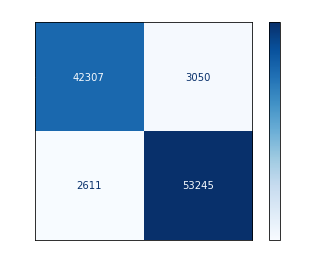

Accuracy: 0.9300860802015536
ROC AUC Score: 0.9287581600452034


In [142]:
from sklearn.metrics import plot_confusion_matrix
color = 'white'
matrix = plot_confusion_matrix(rand_F,data_X, data_Y, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

print('Accuracy:', accuracy_score(y_validation, y_error))
print('ROC AUC Score:', roc_auc_score(y_validation, y_error))

Del resultado de la predicción de pobreza con Random Forest podemos destacar que el modelo linear al corte de 0.7 y así tener la variable binaria y no continua nos arroga un accuracy de 0.93. Se probó el mismo modelo a un corte de 0.5 y el resultado aumenta a 0.97. El cuadrante inferior derecho nos muestra los valores que el modelo correctamente detecto como no pobres y los del cuadrante superior izquierdo los que correctamente detecto como pobres

In [149]:
print("Valor Absoluto Medio  = " + "MSE",np.sqrt(mean_squared_error(y_validation, y_error)))
print(' ')
print('Valor Cuadratico RMSE  = '+"RMSE",np.sqrt(mean_squared_error(y_validation, y_error)))
print('')
print('Valor Logaritmico LMSE  = '+ "LMSE",np.log(np.sqrt(mean_squared_error(y_validation, y_error))))
print('')

r2 = r2_score(y_validation, y_error)
print('R Cuadrado  = ', r2)

Valor Absoluto Medio  = MSE 0.2644124047741451
 
Valor Cuadratico RMSE  = RMSE 0.2644124047741451

Valor Logaritmico LMSE  = LMSE -1.3302452554102082

R Cuadrado  =  0.7173055377493447


### Validación Cruzada

Este tipo de modelamiento nos permite usar la base de datos completa y buscar un cv optimo con el que se buscará tener un promedio de las validaciones. 

In [106]:
from sklearn.model_selection import GridSearchCV, cross_val_score

cross_val_score(rand_F, X_train, y_train, cv=10).mean()

0.9190293758844483

Vemos que al validar con todos los datos el resultado no es tan certero como con el modelo anterior esto puesto existen variables que alteran el resultado

### Grid Search

In [107]:
n_estimators = [10, 100, 500, 1000]
max_depth = [None, 50, 100, 500]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

In [108]:
grid = GridSearchCV(estimator=rand_F, 
                    param_grid=param_grid,
                    cv=5,
                    verbose=2,
                    n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [109]:
grid_result.best_params_

{'max_depth': 100, 'n_estimators': 1000}

In [110]:
grid_result.best_score_

0.909593729286595

En este caso la estimación vuelve a ser más baja, se podría probar con diferentes combinaciones pero dada la capacidad del equipo se probó solo con esta. El resultado no es del todo negativo al estar sobre 0.90

## ADABOOST

In [117]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.20)

In [118]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(n_estimators=12,learning_rate=0.1, loss='linear',random_state=42)

In [119]:
model = ada.fit(X_train, y_train)

In [120]:
X_train.head()

,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,can_add,can_divide,...,reporting_pce,is_interpolated,distribution_type,reporting_pop_y,headcount_y,poverty_gap_y,poverty_severity_y,watts_y,mean_y,pop_in_poverty
28235,0,40,0,1,4,1,2,1,1,1,...,3259.2952,0,2,493090013,0.0178,0.0049,0.0021,0.0066,19.1951,8795759
51868,0,38,0,0,4,1,1,0,0,1,...,3465.6173,0,2,493090013,0.0178,0.0049,0.0021,0.0066,19.1951,8795759
49482,0,84,0,0,3,1,0,0,1,1,...,5152.9721,0,2,493090013,0.0178,0.0049,0.0021,0.0066,19.1951,8795759
58977,0,30,0,1,4,1,3,1,1,1,...,3442.4968,0,2,493090013,0.0178,0.0049,0.0021,0.0066,19.1951,8795759
15981,0,23,0,0,4,4,1,1,1,1,...,3659.9193,0,2,493090013,0.0178,0.0049,0.0021,0.0066,19.1951,8795759


In [121]:
X_test.head()

,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,can_add,can_divide,...,reporting_pce,is_interpolated,distribution_type,reporting_pop_y,headcount_y,poverty_gap_y,poverty_severity_y,watts_y,mean_y,pop_in_poverty
2402,1,66,0,1,3,1,2,1,1,1,...,1116.6425,0,1,1814455018,0.0594,0.0109,0.0033,0.0133,5.0336,107796459
19661,0,45,1,1,4,5,1,0,1,1,...,10328.3161,0,2,493090013,0.0178,0.0049,0.0021,0.0066,19.1951,8795759
81847,0,47,0,1,4,1,3,1,1,1,...,7568.4187,0,2,636226580,0.0341,0.0119,0.0062,0.0151,18.2329,21679985
87848,0,30,0,1,3,4,1,0,1,1,...,2142.2055,0,2,2091765805,0.0088,0.0016,0.0006,0.0019,12.4153,18438607
10956,1,40,1,1,3,1,1,1,1,1,...,3289.0899,0,2,493090013,0.0178,0.0049,0.0021,0.0066,19.1951,8795759


In [122]:
y_pred = model.predict(X_test)

In [123]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
r2=r2_score(y_true=y_test, y_pred=y_pred)
print('r2: ', r2)
mse=mean_squared_error(y_true=y_test, y_pred=y_pred)
print('MSE: ',mse)
mae=median_absolute_error(y_true=y_test, y_pred=y_pred)
print('MAE: ',mae)

r2:  0.2924853518038204
MSE:  0.17477999819849496
MAE:  0.3546805819101835


Al tener resultado de MSE cercano a cero podemos decir que el modelo tiene menor error en la predicción y es de mejor calidad al entregarnos una linea que cruza a través de los valores con una menor distancia. En el caso del MAE también es bueno que se tenga un valor bajo ya que este es el resultado del promedio de los errores.

In [148]:
print("Valor Absoluto Medio  = " + "MSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print(' ')
print('Valor Cuadratico RMSE  = '+"RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print('')
print('Valor Logaritmico LMSE  = '+ "LMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))
print('')

r2 = r2_score(y_test,y_pred)
print('R Cuadrado  = ', r2)

Valor Absoluto Medio  = MSE 0.35554065904312876
 
Valor Cuadratico RMSE  = RMSE 0.35554065904312876

Valor Logaritmico LMSE  = LMSE -1.0341156648494192

R Cuadrado  =  0.4886648009276072


## KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 8) 
knn.fit(X_train,y_train)  
y_pred_knn = knn.predict(X_test) 
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

In [68]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, plot_confusion_matrix

Accuracy: 0.6754433631378748
ROC AUC Score: 0.7264479104736283


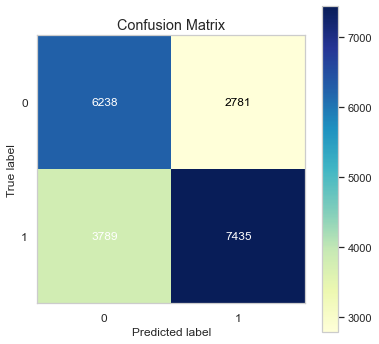

In [133]:
sklearn.metrics.plot_confusion_matrix(y_test, y_pred_knn, figsize=(6,6), cmap= 'YlGnBu');

print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_knn)) 

In [150]:
print("Valor Absoluto Medio  = " + "MSE",np.sqrt(mean_squared_error(y_test,y_pred_knn)))
print(' ')
print('Valor Cuadratico RMSE  = '+"RMSE",np.sqrt(mean_squared_error(y_test,y_pred_knn)))
print('')
print('Valor Logaritmico LMSE  = '+ "LMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred_knn))))
print('')

r2 = r2_score(y_test,y_pred_knn)
print('R Cuadrado  = ', r2)

Valor Absoluto Medio  = MSE 0.7005266154132451
 
Valor Cuadratico RMSE  = RMSE 0.7005266154132451

Valor Logaritmico LMSE  = LMSE -0.35592291904714074

R Cuadrado  =  -0.9850727327414655


Este modelo de clasficación se da en base a la comparación desde un punto base. Se pueden establecer pocos puntos pero tener una varianza más alta, es decir una disperción en los resultados de cada clasificación o bien tener un varios pero el resultado presentar más sesgo pero menor varianza. En este caso se probaron con 2, 4 y 8 y el resultado aumentó de 0.58 a 0.67

## Arbol de decision

Por alguna razón al usar nuevamente el codigo para visualizar la matriz de confusión con los resultados del arbol de decisión el notebook daba error. Buscando en la literatura me di cuenta que se debía a un "bug" por una actualización dado un recambio en el codigo de la matriz por parte de la libreria, por lo que se usó otro codigo para poder graficar en este caso

In [83]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.20)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_pred_dtc = dtc.predict(X_test) 
y_pred_prob_dtc = dtc.predict_proba(X_test)[:, 1]

C:\Users\talon\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


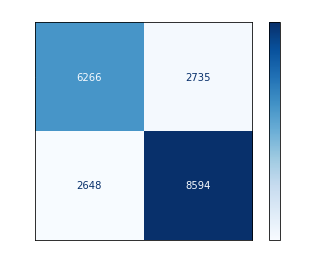

Accuracy: 0.7340809168601492
ROC AUC Score: 0.7928105736773875


In [73]:
from sklearn.metrics import plot_confusion_matrix
color = 'white'
matrix = plot_confusion_matrix(dtc, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

print('Accuracy:', accuracy_score(y_test, y_pred_dtc))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_dtc))

In [99]:
from sklearn import metrics 
print(metrics.classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.45      0.45      0.45      9053
           1       0.56      0.56      0.56     11190

    accuracy                           0.51     20243
   macro avg       0.50      0.50      0.50     20243
weighted avg       0.51      0.51      0.51     20243



In [151]:
print("Valor Absoluto Medio  = " + "MSE",np.sqrt(mean_squared_error(y_test,y_pred_dtc)))
print(' ')
print('Valor Cuadratico RMSE  = '+"RMSE",np.sqrt(mean_squared_error(y_test,y_pred_dtc)))
print('')
print('Valor Logaritmico LMSE  = '+ "LMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred_dtc))))
print('')

r2 = r2_score(y_test,y_pred_dtc)
print('R Cuadrado  = ', r2)

Valor Absoluto Medio  = MSE 0.7012314416458764
 
Valor Cuadratico RMSE  = RMSE 0.7012314416458764

Valor Logaritmico LMSE  = LMSE -0.35491728717153886

R Cuadrado  =  -0.9890692552555413


## XG BOOST

In [120]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [121]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [122]:
y_pred = regressor.predict(X_test)

In [123]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
r2=r2_score(y_true=y_test, y_pred=y_pred)
print('r2: ', r2)
mse=mean_squared_error(y_true=y_test, y_pred=y_pred)
print('MSE: ',mse)
mae=median_absolute_error(y_true=y_test, y_pred=y_pred)
print('MAE: ',mae)

r2:  0.4886648009276072
MSE:  0.12640916023282234
MAE:  0.22671306133270264


Al igual que con ADA Boost en este caso se da que el modelo obtiene valores bajos de error, no obstante como se señalaba anteriormente esto puede ser signo de tener sesgos en la predicción dada la alta cantidad de variables o bien dado el bajo impacto que tiene cada una con la variable de pobreza, como se detalla en la correlación, al menos desde el punto de vista lineal. Esto no nos permite decir que estos modelos predicen de manera efectiva.


## Cat Boost

In [124]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [126]:
import sklearn
from sklearn.metrics import plot_confusion_matrix

In [130]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(verbose= 0)
cb.fit(X_train,y_train)
y_pred_cb = cb.predict(X_test)
y_pred_prob_cb = cb.predict_proba(X_test)[:, 1]


C:\Users\talon\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


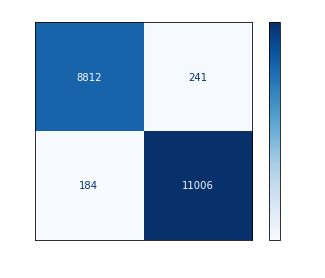

Accuracy: 0.9790050881786296
ROC AUC Score: 0.9976052453296825


In [131]:
from sklearn.metrics import plot_confusion_matrix
color = 'white'
matrix = plot_confusion_matrix(cb, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

print('Accuracy:', accuracy_score(y_test, y_pred_cb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_cb))

Una de las ventajas de este modelo es que permite trabajar con él sin la necesidada de modificar en demasía los datos esto puesto el mismo modelo logra transformar las categorias en numeros para así poder ir clasificando, como también el que no necesita la calibración en exceso de sus hiperparametros para obtener buenos resultados como los que vemos en la matriz, con un accuracy de 0.97, siendo la más alta. 

In [152]:
print("Valor Absoluto Medio  = " + "MSE",np.sqrt(mean_squared_error(y_test,y_pred_cb)))
print(' ')
print('Valor Cuadratico RMSE  = '+"RMSE",np.sqrt(mean_squared_error(y_test,y_pred_cb)))
print('')
print('Valor Logaritmico LMSE  = '+ "LMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred_cb))))
print('')

r2 = r2_score(y_test,y_pred_cb)
print('R Cuadrado  = ', r2)

Valor Absoluto Medio  = MSE 0.14489621051418272
 
Valor Cuadratico RMSE  = RMSE 0.14489621051418272

Valor Logaritmico LMSE  = LMSE -1.93173758241858

R Cuadrado  =  0.9150738965758886


Este resultado de R2 de 0.91 confirma que el modelo de CatBoost es el que mejor opera con la muestra en cuanto a la categorización de los resultados y así la predicción con la muestra.